In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Dataset

In [3]:
# Load dataset
df = pd.read_csv('../data/logistics_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns ({len(df.columns)}): {list(df.columns)}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: (3204, 23)

Columns (23): ['item_id', 'category', 'stock_level', 'reorder_point', 'reorder_frequency_days', 'lead_time_days', 'daily_demand', 'demand_std_dev', 'item_popularity_score', 'storage_location_id', 'zone', 'picking_time_seconds', 'handling_cost_per_unit', 'unit_price', 'holding_cost_per_unit_day', 'stockout_count_last_month', 'order_fulfillment_rate', 'total_orders_last_month', 'turnover_ratio', 'layout_efficiency_score', 'last_restock_date', 'forecasted_demand_next_7d', 'KPI_score']

Memory Usage: 1.40 MB


In [4]:
# Display first few rows
df.head(10)

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2/17/2024,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,10/1/2024,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,4/7/2024,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,1/27/2024,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,5/17/2024,194.58,0.670
5,ITM10005,Apparel,154,62,9,6,35.95,9.47,0.41,L32,...,164.12,0.66,1,0.99,477,7.61,0.95,7/12/2024,180.65,0.803
6,ITM10006,Groceries,86,97,6,4,9.04,4.72,0.28,L29,...,134.38,0.37,8,0.88,418,4.25,0.45,12/10/2024,223.69,0.526
7,ITM10007,Groceries,84,89,13,4,47.82,6.78,0.24,L18,...,131.09,1.42,7,0.74,958,11.37,0.70,11/5/2024,195.75,0.558
8,ITM10008,Groceries,311,22,4,9,33.72,7.04,0.15,L95,...,13.32,0.71,8,0.86,697,10.64,0.29,11/4/2024,105.74,0.541
9,ITM10009,Automotive,44,98,9,8,3.91,8.78,0.89,L14,...,70.32,1.63,8,1.00,496,2.65,0.27,1/21/2024,154.78,0.366


In [5]:
# Data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [6]:
# Statistical summary
df.describe()

,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


## 2. Missing Values Analysis

In [7]:
# Check for missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("Missing Values Found:")
    print(missing_data)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    plt.barh(missing_data['Column'], missing_data['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Feature')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values detected in the dataset!")

✅ No missing values detected in the dataset!


## 3. Target Variable Analysis (KPI_score)

In [8]:
# Target variable statistics
target = 'KPI_score'
print(f"Target Variable: {target}")
print(f"Mean: {df[target].mean():.4f}")
print(f"Median: {df[target].median():.4f}")
print(f"Std Dev: {df[target].std():.4f}")
print(f"Min: {df[target].min():.4f}")
print(f"Max: {df[target].max():.4f}")
print(f"Skewness: {df[target].skew():.4f}")
print(f"Kurtosis: {df[target].kurtosis():.4f}")

Target Variable: KPI_score
Mean: 0.6017
Median: 0.6010
Std Dev: 0.1083
Min: 0.2590
Max: 0.9360
Skewness: -0.0186
Kurtosis: -0.2467


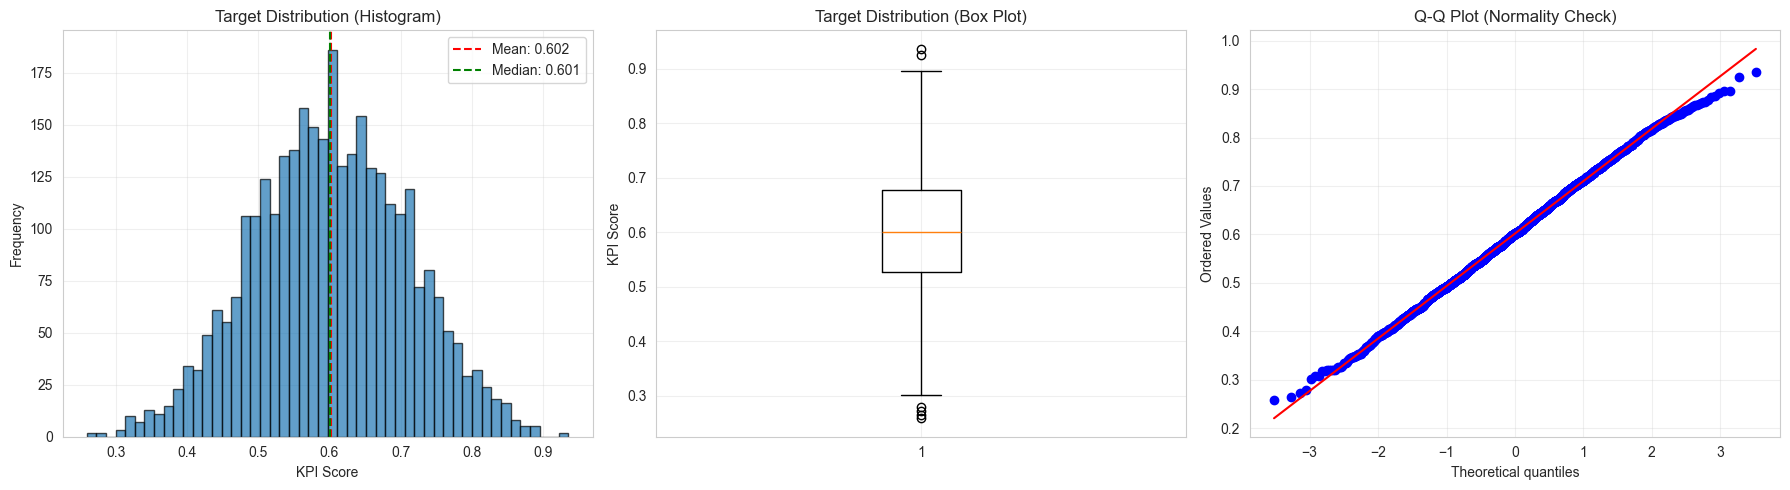

In [9]:
# Visualize target distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df[target], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df[target].mean(), color='red', linestyle='--', label=f'Mean: {df[target].mean():.3f}')
axes[0].axvline(df[target].median(), color='green', linestyle='--', label=f'Median: {df[target].median():.3f}')
axes[0].set_xlabel('KPI Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Target Distribution (Histogram)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df[target], vert=True)
axes[1].set_ylabel('KPI Score')
axes[1].set_title('Target Distribution (Box Plot)')
axes[1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(df[target], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Categorical Features Analysis

In [10]:
# Identify categorical columns
categorical_cols = ['category', 'zone', 'storage_location_id', 'item_id']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Value counts:\n{df[col].value_counts().head(10)}")


category:
  Unique values: 5
  Value counts:
category
Pharma         660
Automotive     658
Electronics    651
Groceries      618
Apparel        617
Name: count, dtype: int64

zone:
  Unique values: 4
  Value counts:
zone
D    833
A    812
B    784
C    775
Name: count, dtype: int64

storage_location_id:
  Unique values: 100
  Value counts:
storage_location_id
L57    41
L59    41
L31    41
L87    40
L37    40
L83    40
L71    39
L39    39
L85    39
L99    39
Name: count, dtype: int64

item_id:
  Unique values: 3204
  Value counts:
item_id
ITM10000    1
ITM12140    1
ITM12130    1
ITM12131    1
ITM12132    1
ITM12133    1
ITM12134    1
ITM12135    1
ITM12136    1
ITM12137    1
Name: count, dtype: int64


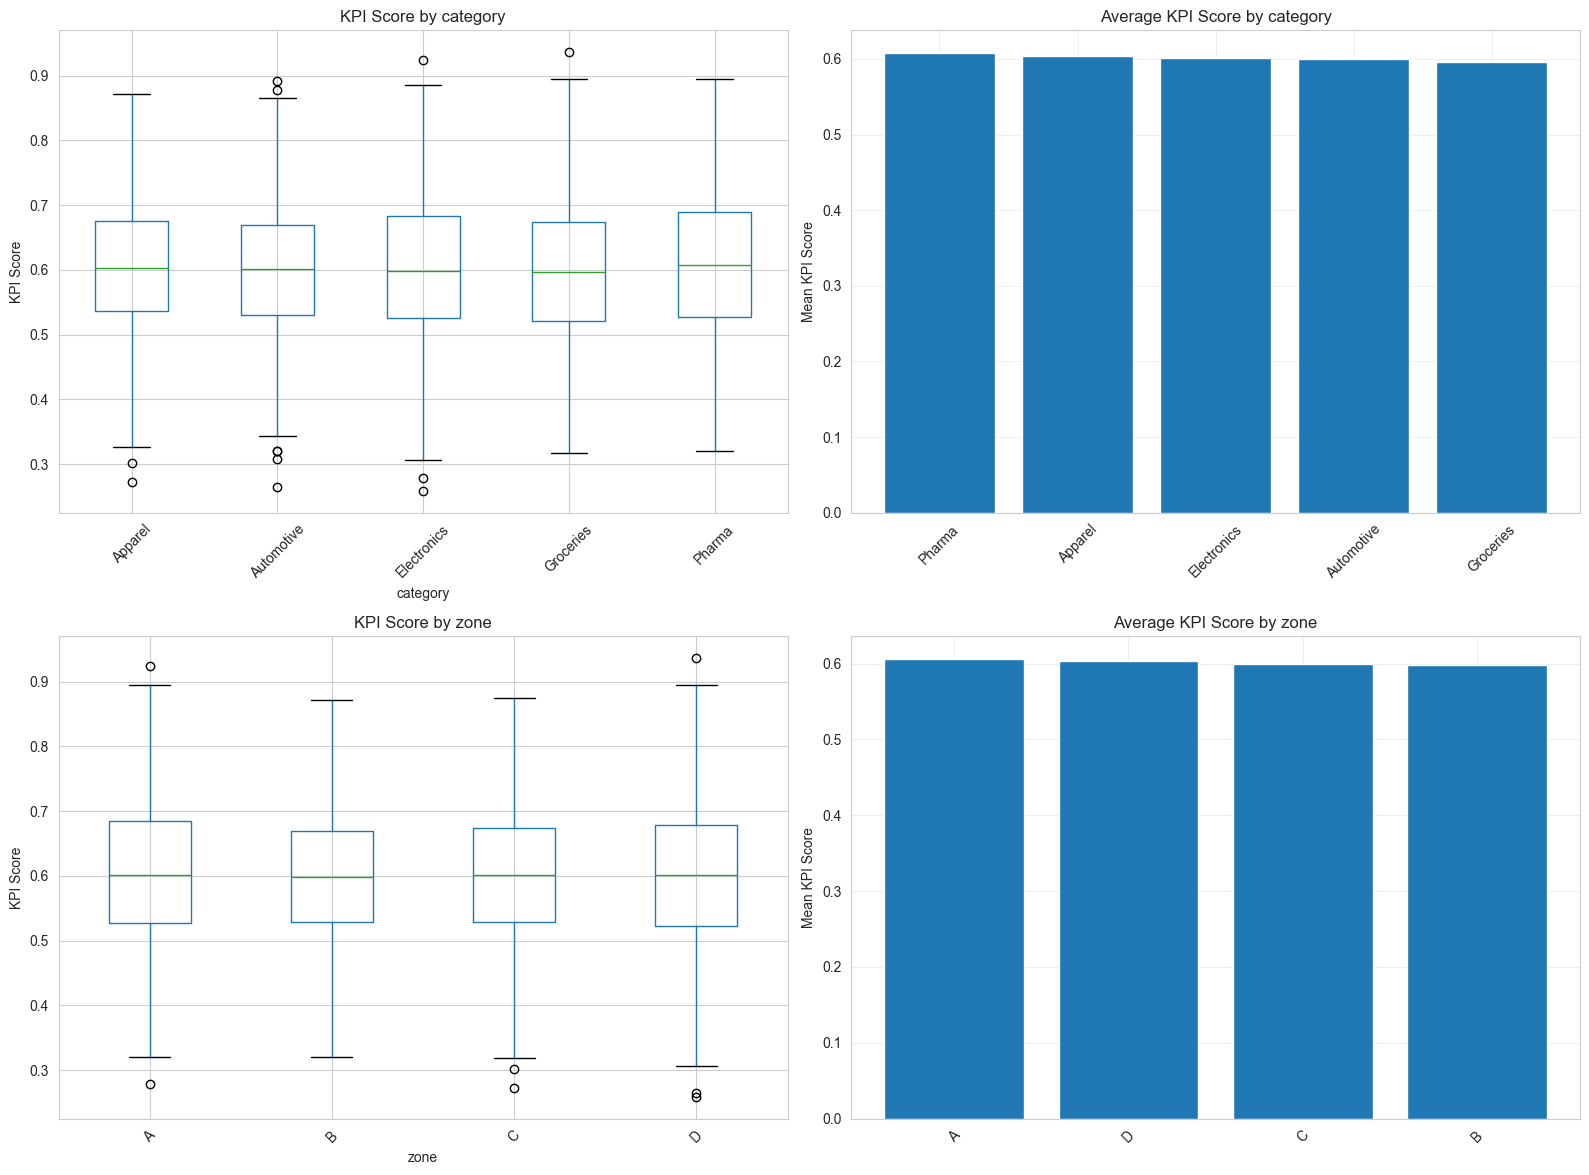

In [11]:
# Visualize categorical features vs target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(['category', 'zone']):
    if col in df.columns:
        # Box plot
        df.boxplot(column='KPI_score', by=col, ax=axes[idx*2])
        axes[idx*2].set_title(f'KPI Score by {col}')
        axes[idx*2].set_xlabel(col)
        axes[idx*2].set_ylabel('KPI Score')
        plt.sca(axes[idx*2])
        plt.xticks(rotation=45)
        
        # Mean KPI by category
        mean_kpi = df.groupby(col)['KPI_score'].mean().sort_values(ascending=False)
        axes[idx*2+1].bar(range(len(mean_kpi)), mean_kpi.values)
        axes[idx*2+1].set_xticks(range(len(mean_kpi)))
        axes[idx*2+1].set_xticklabels(mean_kpi.index, rotation=45)
        axes[idx*2+1].set_ylabel('Mean KPI Score')
        axes[idx*2+1].set_title(f'Average KPI Score by {col}')
        axes[idx*2+1].grid(True, alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 5. Numerical Features Analysis

In [12]:
# Select numerical features (excluding ID columns and target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['KPI_score']]

print(f"Numerical Features ({len(numerical_cols)}):")
print(numerical_cols)

Numerical Features (17):
['stock_level', 'reorder_point', 'reorder_frequency_days', 'lead_time_days', 'daily_demand', 'demand_std_dev', 'item_popularity_score', 'picking_time_seconds', 'handling_cost_per_unit', 'unit_price', 'holding_cost_per_unit_day', 'stockout_count_last_month', 'order_fulfillment_rate', 'total_orders_last_month', 'turnover_ratio', 'layout_efficiency_score', 'forecasted_demand_next_7d']


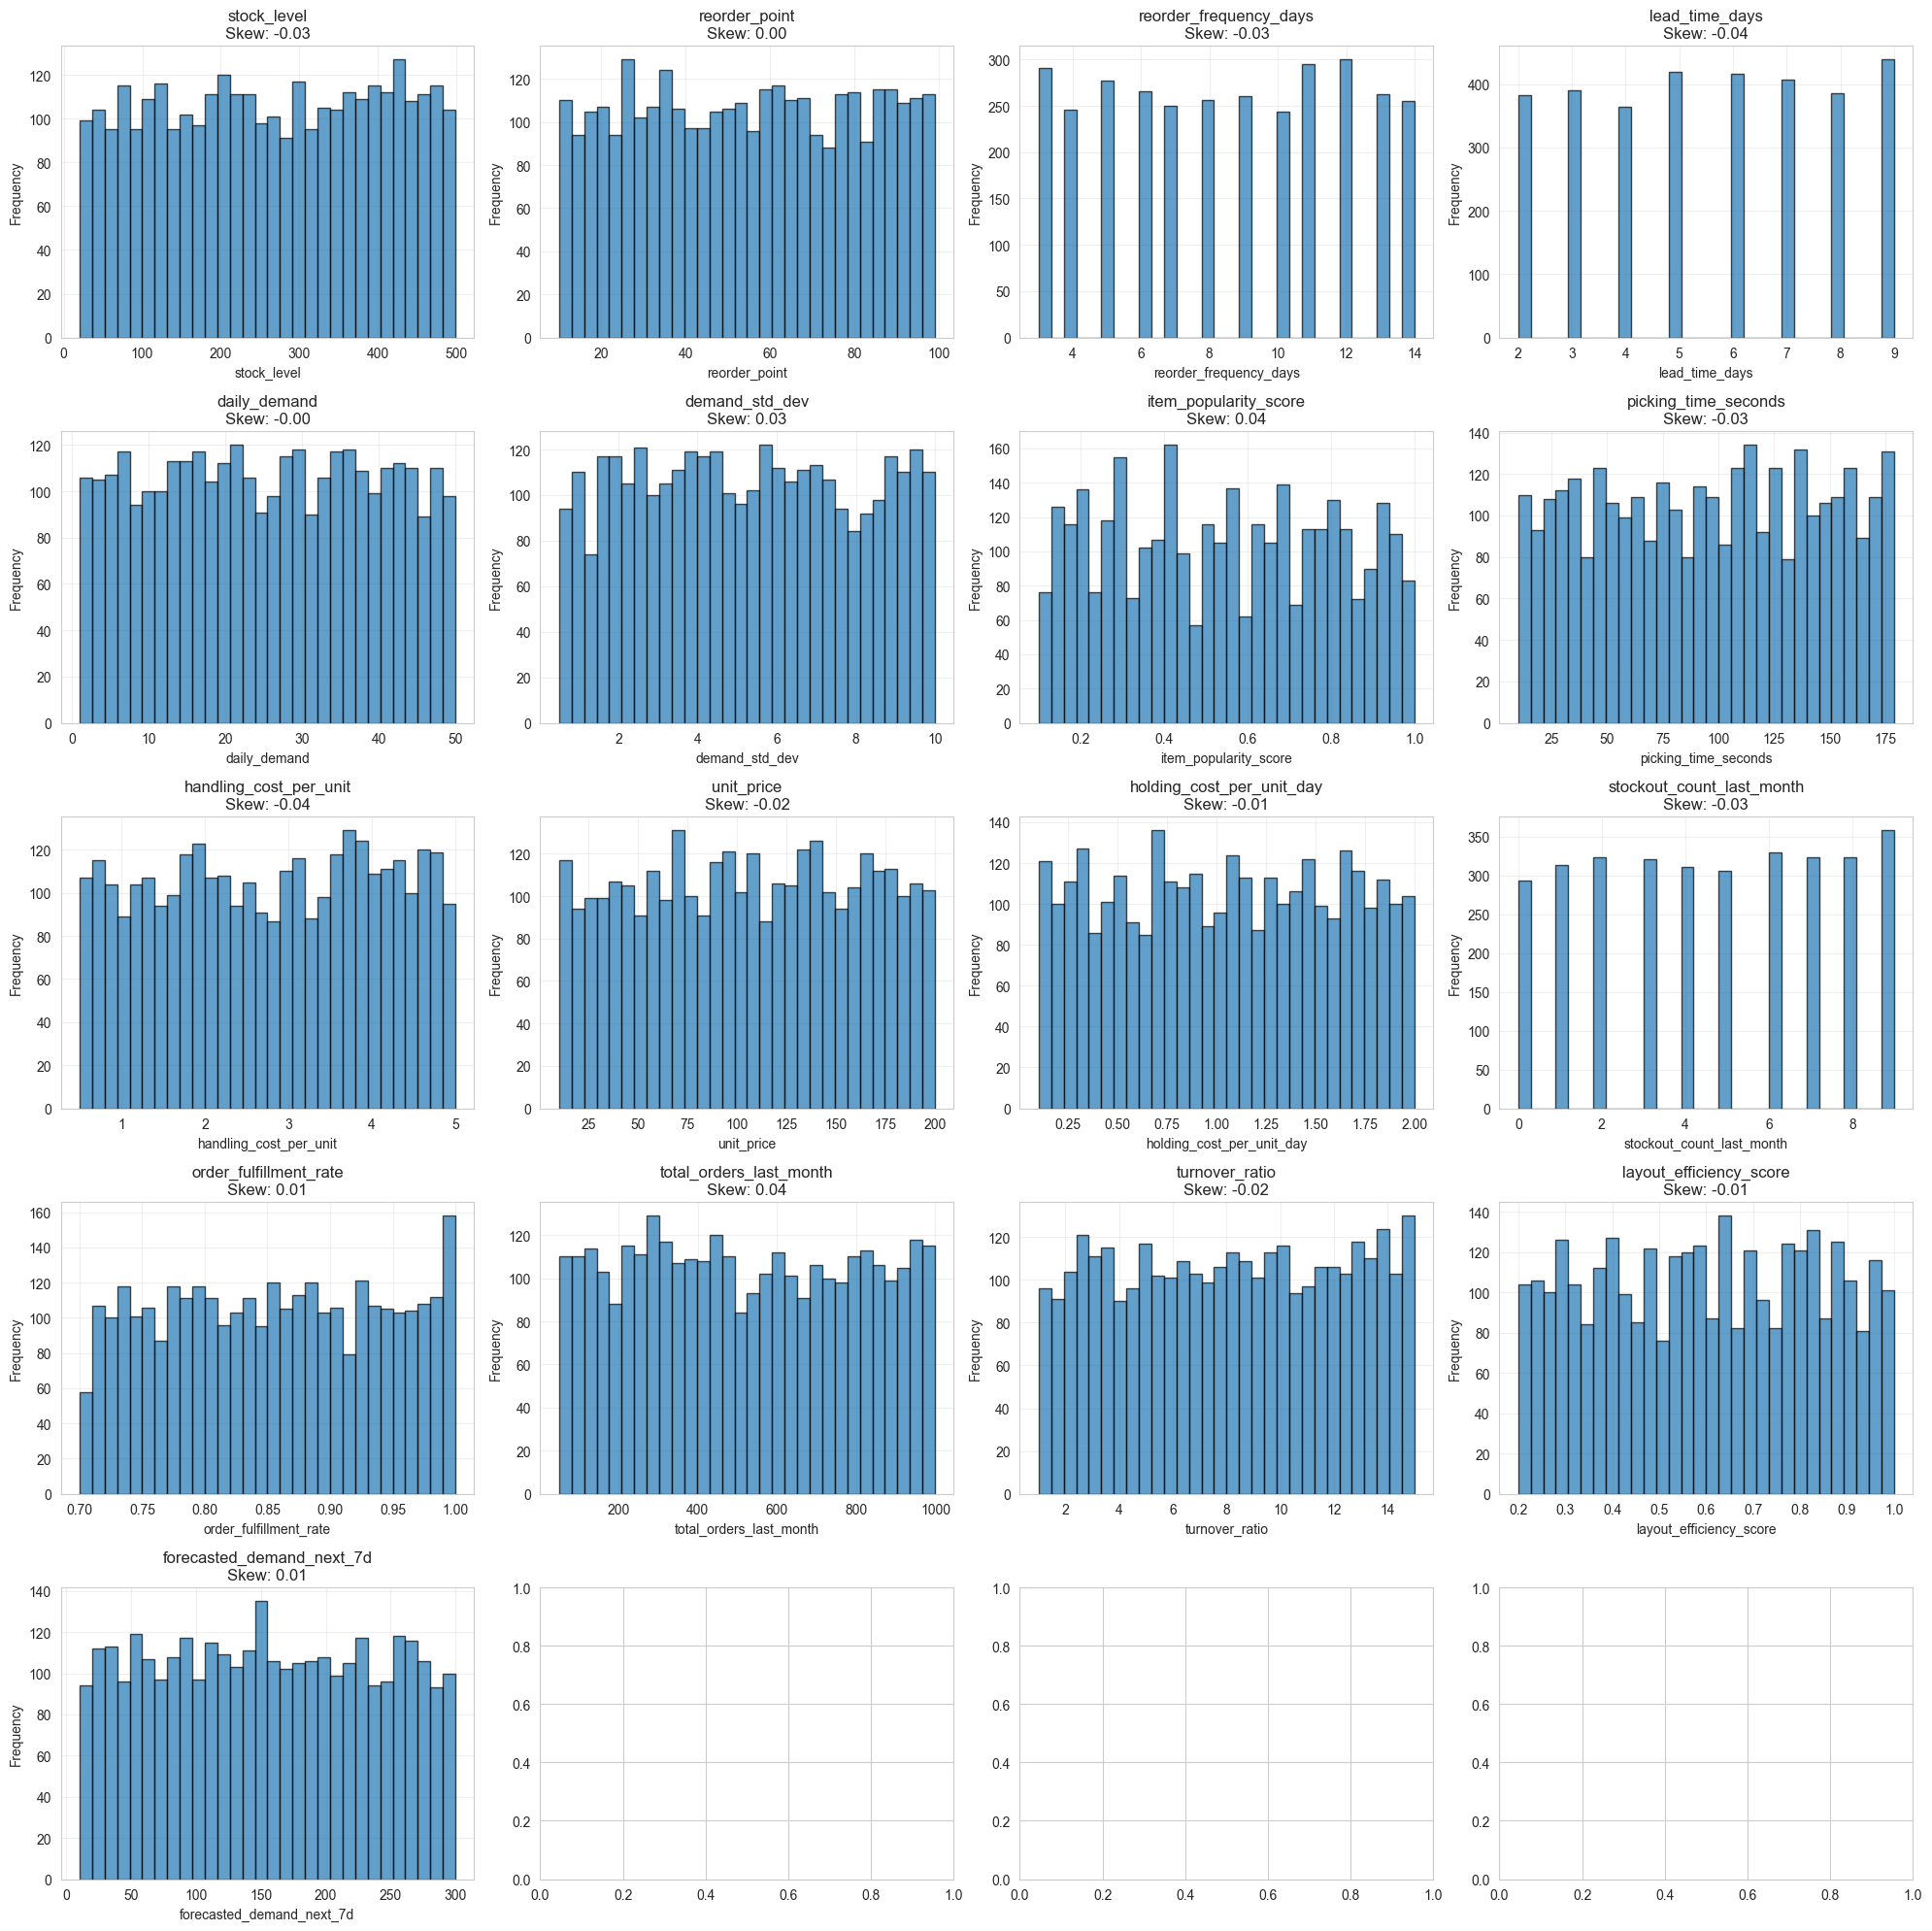

In [13]:
# Distribution of numerical features
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:20]):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\nSkew: {df[col].skew():.2f}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

Correlation with Target (KPI_score):
KPI_score                    1.000000
turnover_ratio               0.498342
layout_efficiency_score      0.430048
order_fulfillment_rate       0.147592
demand_std_dev               0.028038
lead_time_days               0.025215
picking_time_seconds         0.013927
forecasted_demand_next_7d    0.012701
stock_level                  0.009193
reorder_frequency_days       0.004684
handling_cost_per_unit      -0.002418
unit_price                  -0.002779
daily_demand                -0.005780
total_orders_last_month     -0.009105
item_popularity_score       -0.028258
reorder_point               -0.028296
holding_cost_per_unit_day   -0.503307
stockout_count_last_month   -0.540414
Name: KPI_score, dtype: float64


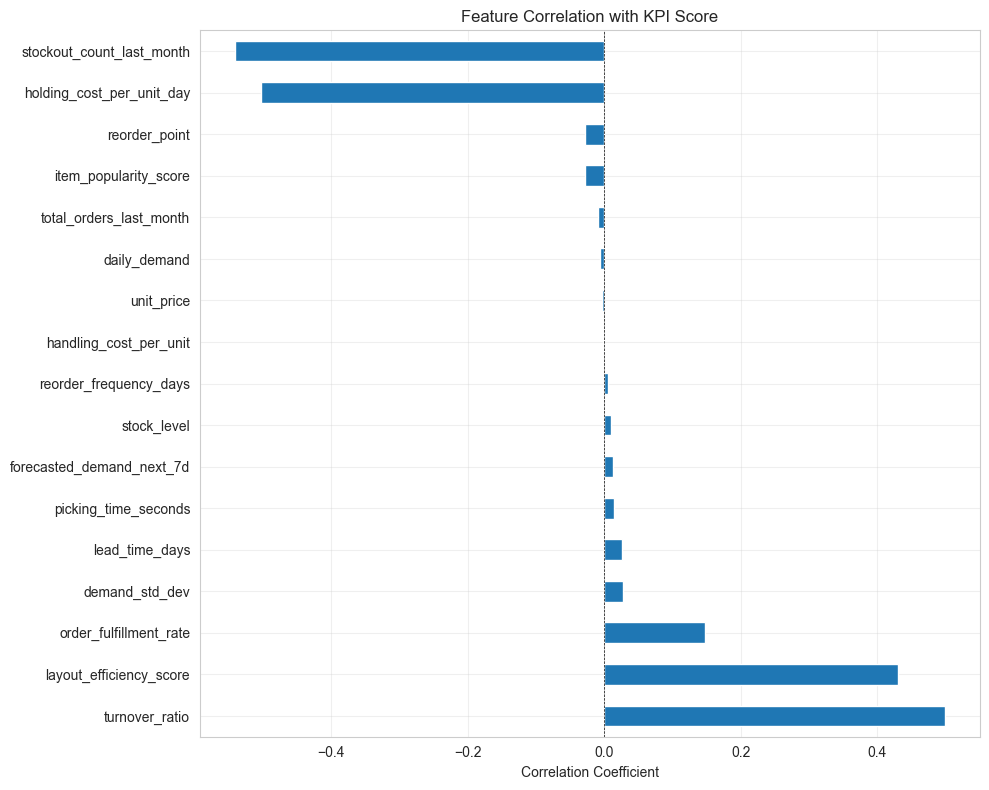

In [14]:
# Correlation matrix with target
correlation_with_target = df[numerical_cols + ['KPI_score']].corr()['KPI_score'].sort_values(ascending=False)
print("Correlation with Target (KPI_score):")
print(correlation_with_target)

# Visualize top correlations
plt.figure(figsize=(10, 8))
correlation_with_target[1:].plot(kind='barh')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with KPI Score')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

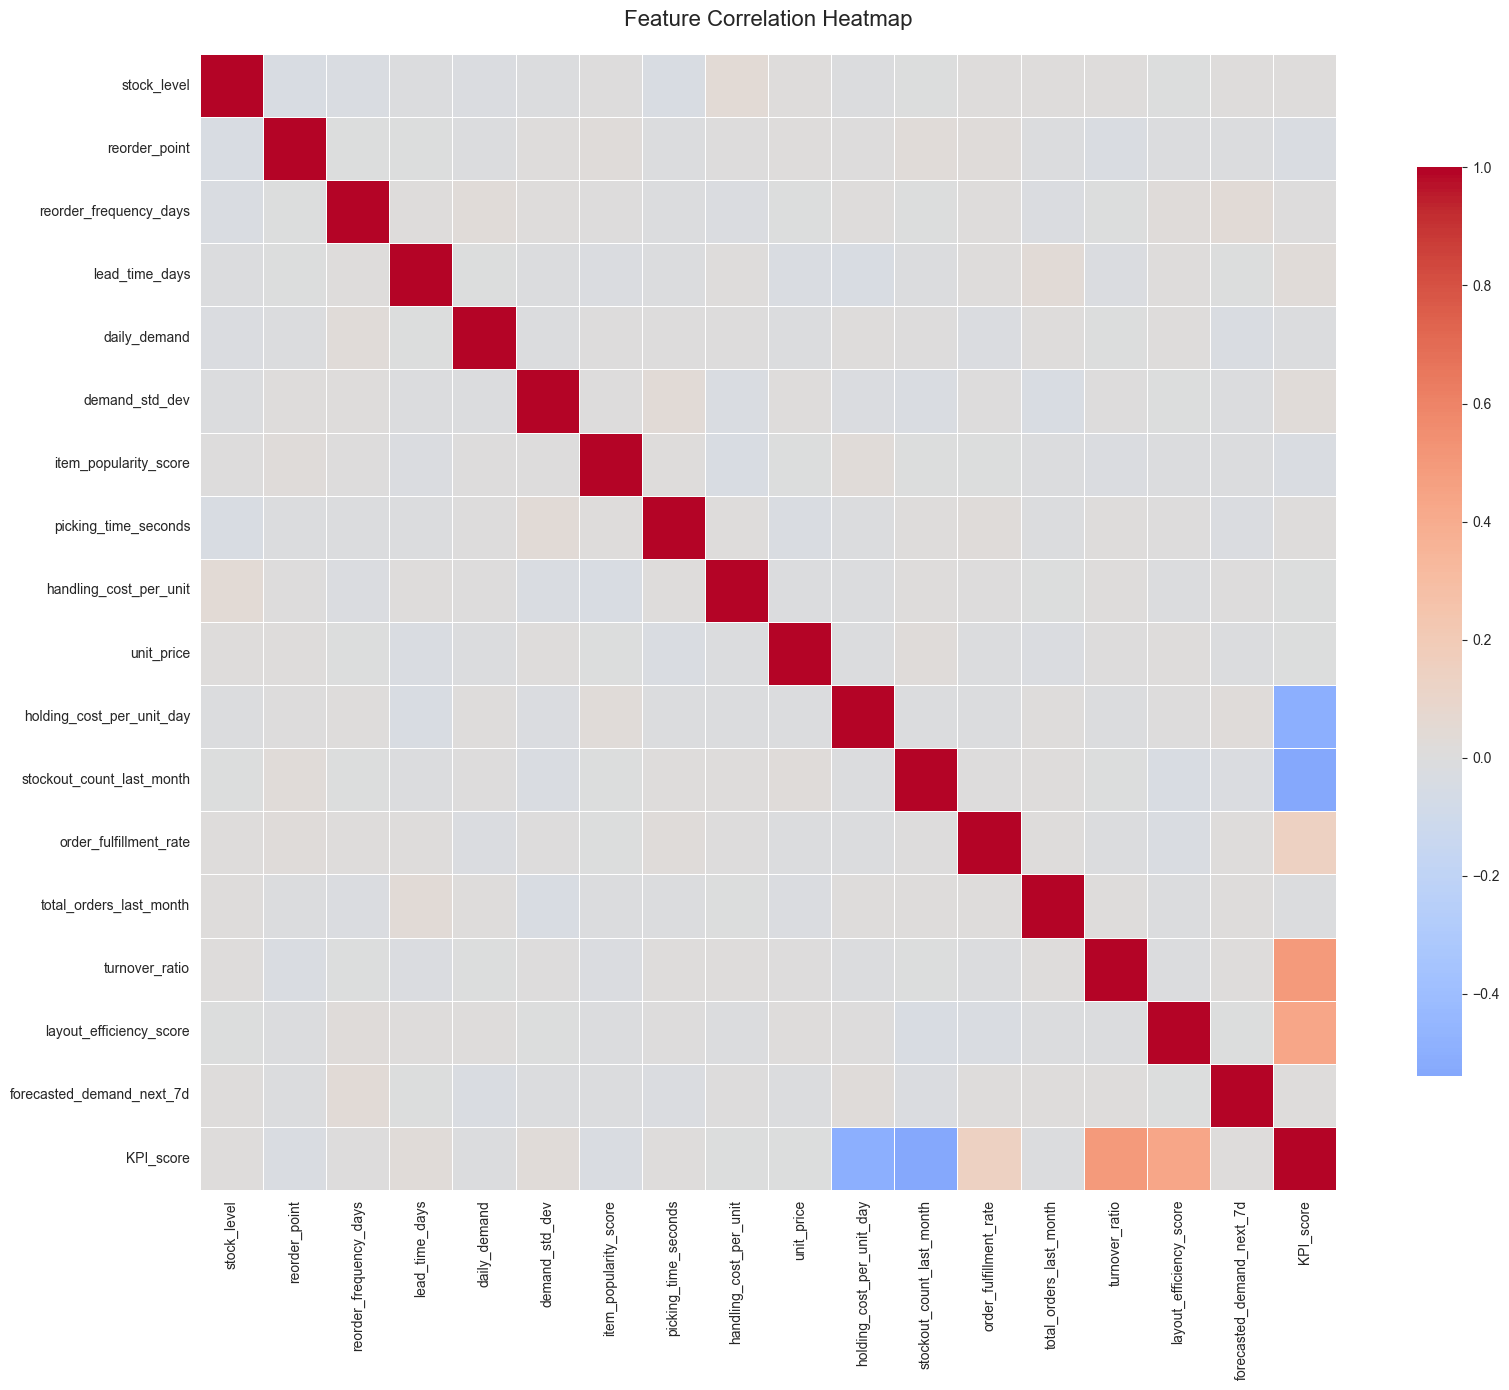

In [15]:
# Full correlation heatmap
plt.figure(figsize=(18, 14))
correlation_matrix = df[numerical_cols + ['KPI_score']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [16]:
# Identify highly correlated feature pairs (multicollinearity check)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("⚠️ Highly Correlated Feature Pairs (|corr| > 0.85):")
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print(high_corr_df)
else:
    print("✅ No highly correlated feature pairs found (threshold: 0.85)")

✅ No highly correlated feature pairs found (threshold: 0.85)


## 7. Outlier Detection

In [17]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), (len(outliers) / len(data)) * 100

outlier_summary = []
for col in numerical_cols:
    count, percentage = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': count,
        'Outlier_Percentage': round(percentage, 2)
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
print("Outlier Summary (IQR Method):")
print(outlier_df.head(15))

Outlier Summary (IQR Method):
                      Feature  Outlier_Count  Outlier_Percentage
0                 stock_level              0                 0.0
9                  unit_price              0                 0.0
15    layout_efficiency_score              0                 0.0
14             turnover_ratio              0                 0.0
13    total_orders_last_month              0                 0.0
12     order_fulfillment_rate              0                 0.0
11  stockout_count_last_month              0                 0.0
10  holding_cost_per_unit_day              0                 0.0
8      handling_cost_per_unit              0                 0.0
1               reorder_point              0                 0.0
7        picking_time_seconds              0                 0.0
6       item_popularity_score              0                 0.0
5              demand_std_dev              0                 0.0
4                daily_demand              0                

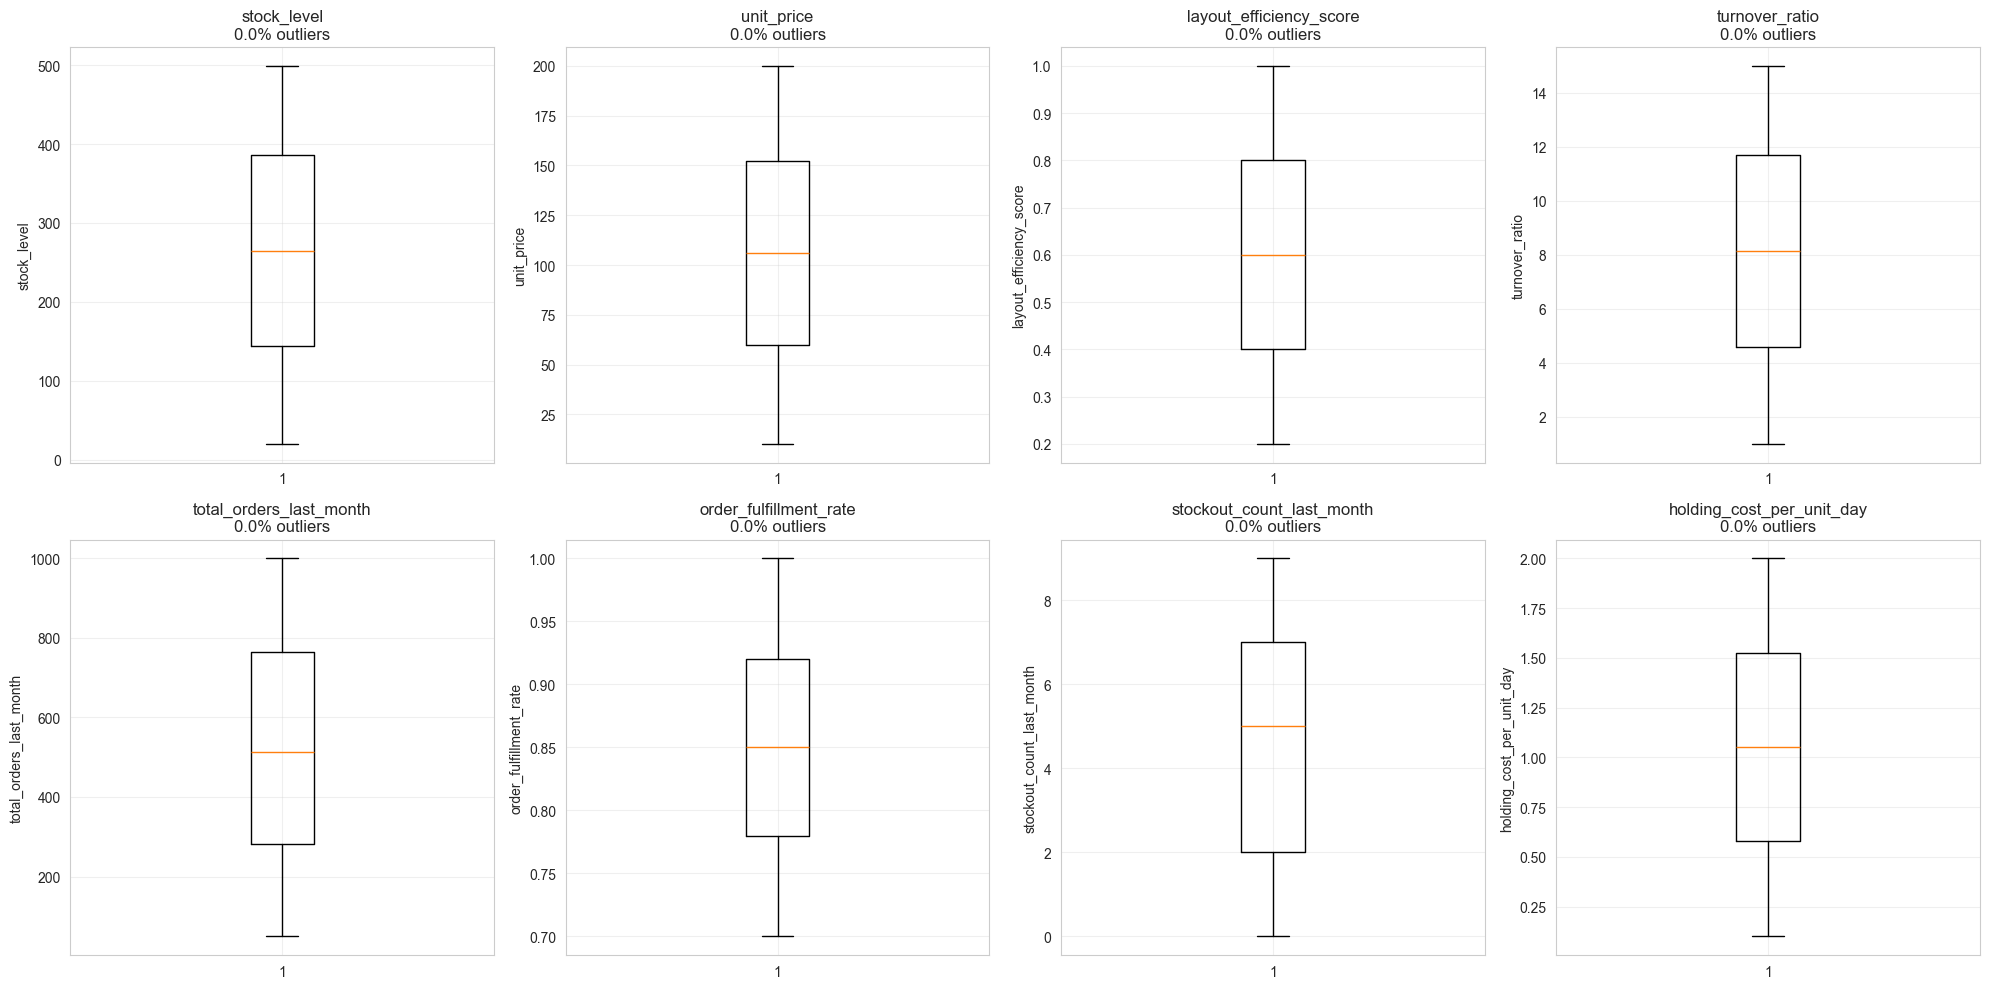

In [18]:
# Visualize outliers for top features
top_outlier_features = outlier_df.head(8)['Feature'].tolist()
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(top_outlier_features):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'{col}\n{outlier_df[outlier_df["Feature"]==col]["Outlier_Percentage"].values[0]:.1f}% outliers')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Date Feature Analysis

In [19]:
# Convert date column
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

# Extract date components
df['restock_year'] = df['last_restock_date'].dt.year
df['restock_month'] = df['last_restock_date'].dt.month
df['restock_day_of_week'] = df['last_restock_date'].dt.dayofweek
df['restock_day'] = df['last_restock_date'].dt.day

# Calculate days since restock (from latest date in dataset)
reference_date = df['last_restock_date'].max()
df['days_since_restock'] = (reference_date - df['last_restock_date']).dt.days

print(f"Date Range: {df['last_restock_date'].min()} to {df['last_restock_date'].max()}")
print(f"\nDays Since Restock Statistics:")
print(df['days_since_restock'].describe())

Date Range: 2024-01-01 00:00:00 to 2024-12-30 00:00:00

Days Since Restock Statistics:
count    3204.000000
mean      178.603620
std       106.326755
min         0.000000
25%        84.000000
50%       177.000000
75%       272.000000
max       364.000000
Name: days_since_restock, dtype: float64


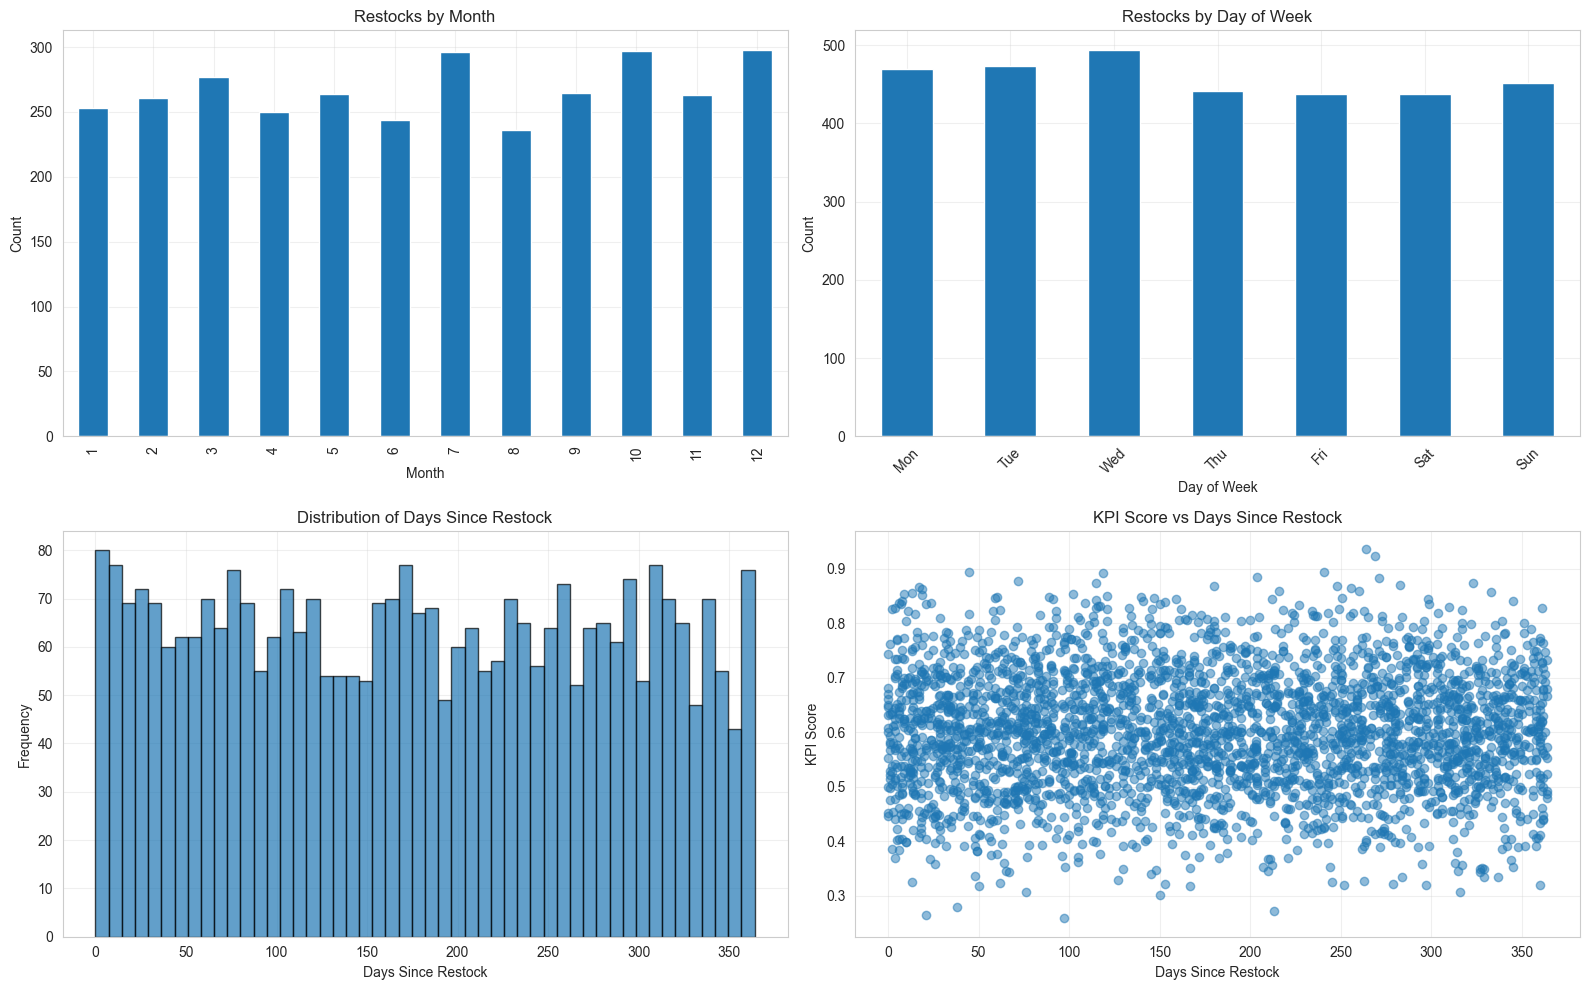

In [20]:
# Visualize date features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Restocks by month
df['restock_month'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Restocks by Month')
axes[0, 0].grid(True, alpha=0.3)

# Restocks by day of week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['restock_day_of_week'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_xticklabels(day_names, rotation=45)
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Restocks by Day of Week')
axes[0, 1].grid(True, alpha=0.3)

# Days since restock distribution
axes[1, 0].hist(df['days_since_restock'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Days Since Restock')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Days Since Restock')
axes[1, 0].grid(True, alpha=0.3)

# KPI score vs days since restock
axes[1, 1].scatter(df['days_since_restock'], df['KPI_score'], alpha=0.5)
axes[1, 1].set_xlabel('Days Since Restock')
axes[1, 1].set_ylabel('KPI Score')
axes[1, 1].set_title('KPI Score vs Days Since Restock')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Feature Relationships with Target

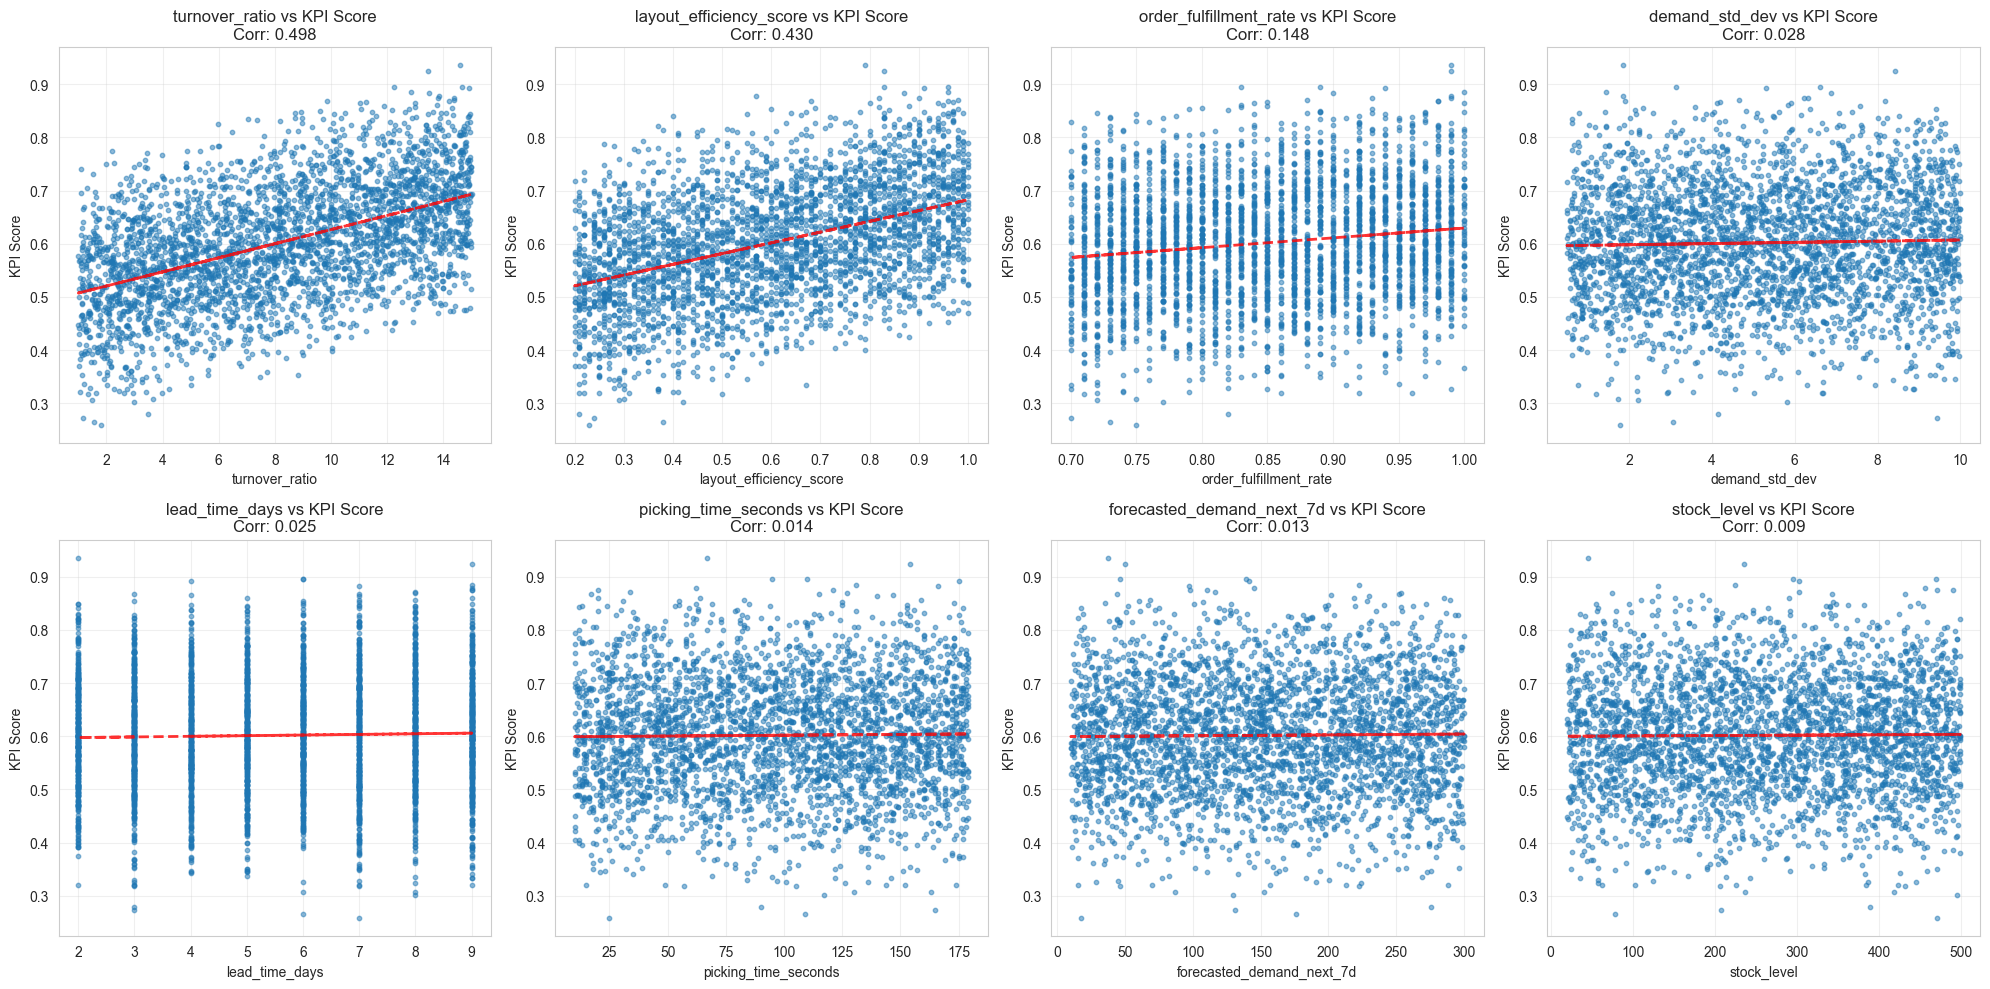

In [21]:
# Scatter plots for top correlated features
top_features = correlation_with_target[1:9].index.tolist()
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(top_features):
    axes[idx].scatter(df[col], df['KPI_score'], alpha=0.5, s=10)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('KPI Score')
    axes[idx].set_title(f'{col} vs KPI Score\nCorr: {correlation_with_target[col]:.3f}')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[col], df['KPI_score'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

## 10. Key Insights Summary

In [ ]:
print("="*80)
print("KEY INSIGHTS FROM EDA")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df):,}")
print(f"   - Total features: {len(df.columns)}")
print(f"   - Numerical features: {len(numerical_cols)}")
print(f"   - Categorical features: 4 (category, zone, storage_location_id, item_id)")

print(f"\n2. TARGET VARIABLE (KPI_score):")
print(f"   - Range: [{df['KPI_score'].min():.3f}, {df['KPI_score'].max():.3f}]")
print(f"   - Mean: {df['KPI_score'].mean():.3f}")
print(f"   - Std Dev: {df['KPI_score'].std():.3f}")
print(f"   - Skewness: {df['KPI_score'].skew():.3f}")

print(f"\n3. MISSING VALUES:")
if df.isnull().sum().sum() == 0:
    print(f"    No missing values in dataset")
else:
    print(f"    {df.isnull().sum().sum()} missing values found")

print(f"\n4. TOP 5 FEATURES CORRELATED WITH TARGET:")
for idx, (feature, corr) in enumerate(correlation_with_target[1:6].items(), 1):
    print(f"   {idx}. {feature}: {corr:.4f}")

print(f"\n5. MULTICOLLINEARITY:")
if high_corr_pairs:
    print(f"    {len(high_corr_pairs)} highly correlated pairs found (|corr| > 0.85)")
else:
    print(f"    No severe multicollinearity detected")

print(f"\n6. OUTLIERS:")
total_outlier_count = outlier_df['Outlier_Count'].sum()
print(f"   - Total outlier instances across features: {total_outlier_count:,}")
print(f"   - Features with >5% outliers: {len(outlier_df[outlier_df['Outlier_Percentage'] > 5])}")

print(f"\n7. CATEGORICAL FEATURES:")
print(f"   - category: {df['category'].nunique()} unique values")
print(f"   - zone: {df['zone'].nunique()} unique values")
print(f"   - storage_location_id: {df['storage_location_id'].nunique()} unique values (high cardinality)")
print(f"   - item_id: {df['item_id'].nunique()} unique values (should drop)")

print(f"\n8. DATE FEATURE:")
print(f"   - Date range: {df['last_restock_date'].min().date()} to {df['last_restock_date'].max().date()}")
print(f"   - Days since restock range: {df['days_since_restock'].min()}-{df['days_since_restock'].max()} days")

print("\n" + "="*80)
print("READY FOR FEATURE ENGINEERING AND MODEL TRAINING")
print("="*80)

KEY INSIGHTS FROM EDA

1. DATASET OVERVIEW:
   - Total samples: 3,204
   - Total features: 28
   - Numerical features: 17
   - Categorical features: 4 (category, zone, storage_location_id, item_id)

2. TARGET VARIABLE (KPI_score):
   - Range: [0.259, 0.936]
   - Mean: 0.602
   - Std Dev: 0.108
   - Skewness: -0.019

3. MISSING VALUES:
   ✅ No missing values in dataset

4. TOP 5 FEATURES CORRELATED WITH TARGET:
   1. turnover_ratio: 0.4983
   2. layout_efficiency_score: 0.4300
   3. order_fulfillment_rate: 0.1476
   4. demand_std_dev: 0.0280
   5. lead_time_days: 0.0252

5. MULTICOLLINEARITY:
   ✅ No severe multicollinearity detected

6. OUTLIERS:
   - Total outlier instances across features: 0
   - Features with >5% outliers: 0

7. CATEGORICAL FEATURES:
   - category: 5 unique values
   - zone: 4 unique values
   - storage_location_id: 100 unique values (high cardinality)
   - item_id: 3204 unique values (should drop)

8. DATE FEATURE:
   - Date range: 2024-01-01 to 2024-12-30
   - Day

In [23]:
# Save processed dataframe for model training
df.to_csv('../data/logistics_dataset_with_date_features.csv', index=False)
print("✅ Dataset with date features saved to: ../data/logistics_dataset_with_date_features.csv")

✅ Dataset with date features saved to: ../data/logistics_dataset_with_date_features.csv
